# Homework 02 --- Session 3, Multilinear regression

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
%matplotlib inline



In [3]:
data = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv',index_col=0)
data



,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


#### Calculating coefficients  ŵ  manually or with python numpy module by using matrix computation.


In [4]:
Y = np.matrix(data.y).T
X = np.matrix(data.drop('y',axis=1))
w = (X.T * X).I * X.T * Y


If the model's formula is: 

$$y = w_0 + w_1x_2 + w_2x_3 + \epsilon$$

Then the coefficients are: 

In [5]:
print ' w_0 = %.1f \n w_1 = %.1f \n w_2 = %.1f' %(w[0],w[1],w[2])

 w_0 = 2.0 
 w_1 = 0.7 
 w_2 = -0.5


#### Calculating coefficients by implementing the OLS regression function with python *statsmodels* module.

In [6]:
lm = smf.ols(formula = 'y ~ x2 + x3',data = data).fit()
print lm.params

Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


#### d)  3D Visualization 

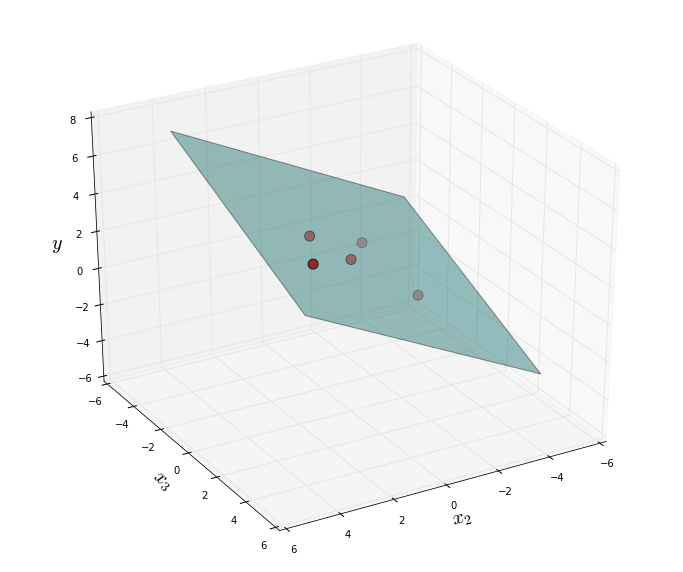

In [7]:
fig = plt.figure(figsize = (12,10))  
ax = fig.gca(projection='3d')  
ax.scatter(data.x2, data.x3, data.y, s = 100,  c = 'r')

#hyperplane
radius = 5
x2, x3 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm.params[0] + lm.params[1] * x2 + lm.params[2] * x3

ax.plot_surface(x2, x3, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_2$', fontsize = 20)
ax.set_ylabel('$x_3$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

##### Prediction

In [8]:
data['predictedValues'] = lm.predict(data)
data['errors']= data.y - data.predictedValues

data

,y,x1,x2,x3,predictedValues,errors
1,0,1,-2,1,0.1,-1.000000e-01
2,2,1,-1,-1,1.8,2.000000e-01
3,2,1,0,0,2.0,4.440892e-16
4,3,1,1,-1,3.2,-2.000000e-01
5,3,1,2,1,2.9,1.000000e-01


#### PLOTING PREDICTED VS Y AND ERRORS VS PREDICTED

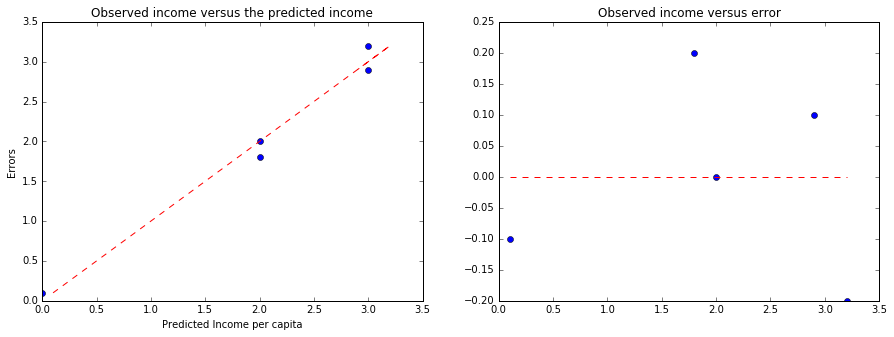

In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.plot(data.y,data.predictedValues,'o')
ax.plot(data.predictedValues,data.predictedValues,'--r', linewidth = 1)       

ax.set_title('Observed income versus the predicted income')
ax.set_xlabel('Income per capita')
ax.set_ylabel('Predicted income')

ax2.plot(data.predictedValues,data.errors,'o')
ax2.plot([min(data.predictedValues),max(data.predictedValues)],[0,0],'--r', linewidth = 1)       
ax2.set_title('Observed income versus error')
ax.set_xlabel('Predicted Income per capita')
ax.set_ylabel('Errors')

In [29]:
#correlation matrix
data2.corr()

,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,both,onlyPublic,onlyPrivate,predictedIncome,errors
IncomePerCapita,1.000000,-0.374920,-6.027527e-01,6.027527e-01,1.015777e-01,-7.464168e-01,7.780395e-01,7.888058e-01,6.146425e-01
TotalPop,-0.374920,1.000000,3.813918e-01,-3.813918e-01,-1.798632e-01,4.435680e-01,-4.338298e-01,-4.587804e-01,-2.120149e-02
NoCoverage,-0.602753,0.381392,1.000000e+00,-1.000000e+00,-3.444472e-01,5.563888e-01,-6.794304e-01,-7.641332e-01,7.956854e-16
WithCoverage,0.602753,-0.381392,-1.000000e+00,1.000000e+00,3.444472e-01,-5.563888e-01,6.794304e-01,7.641332e-01,-8.475116e-16
both,0.101578,-0.179863,-3.444472e-01,3.444472e-01,1.000000e+00,-2.013090e-01,-2.464449e-02,1.287740e-01,-3.447128e-15
onlyPublic,-0.746417,0.443568,5.563888e-01,-5.563888e-01,-2.013090e-01,1.000000e+00,-9.402093e-01,-9.462619e-01,9.193421e-16
onlyPrivate,0.778040,-0.433830,-6.794304e-01,6.794304e-01,-2.464449e-02,-9.402093e-01,1.000000e+00,9.863512e-01,-1.901170e-16
predictedIncome,0.788806,-0.458780,-7.641332e-01,7.641332e-01,1.287740e-01,-9.462619e-01,9.863512e-01,1.000000e+00,-6.671991e-16
errors,0.614643,-0.021201,7.956854e-16,-8.475116e-16,-3.447128e-15,9.193421e-16,-1.901170e-16,-6.671991e-16,1.000000e+00


# polinomyal fit

          y    x1
0  2.613388 -0.50
1  2.170351 -0.32
2  0.049546 -0.14
3  1.158258  0.04
4  1.397567  0.22
5  1.773240  0.40


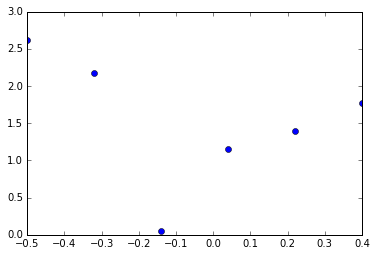

In [13]:
data3 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv')
print data3
plt.plot(data3.x1,data3.y,'o')

#### b) Create new columns in data frame to contain the information of  $x^2, x^3, x^4$  

In [14]:
power = 2
formula = 'y ~ x1'
lm = smf.ols(formula = formula, data = data3).fit()
Rdict = {'x1':{'R2':lm.rsquared,'params':lm.params}}


while power <=4 :
    xId = 'x'+str(power)
    
    #c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    data3[xId] = data3.x1 * data3.iloc[:,len(data3.columns)-1]
    formula = formula + ' + ' + xId 
    lm = smf.ols(formula = formula, data = data3).fit()    

    #For each model, store your fitted parameters as well as your  R2
    Rdict[xId] = {'R2':lm.rsquared,'params':lm.params}
    
    #d) Report the  R2R2 , plot it and observe how it changes
    if power == 2:
        print 'R2 x1: %.2f' %Rdict['x1']['R2']
    print 'R2 %s: %.2f'  %(xId,Rdict[xId]['R2'])
    power += 1


R2 x1: 0.10
R2 x2: 0.65
R2 x3: 0.67
R2 x4: 0.80


#### e) Create a figure with four  subfigures

y0_fited -0.0858791285809
y0_fited 0.0633052294332
y0_fited 0.130464398498
y0_fited 0.432215434196


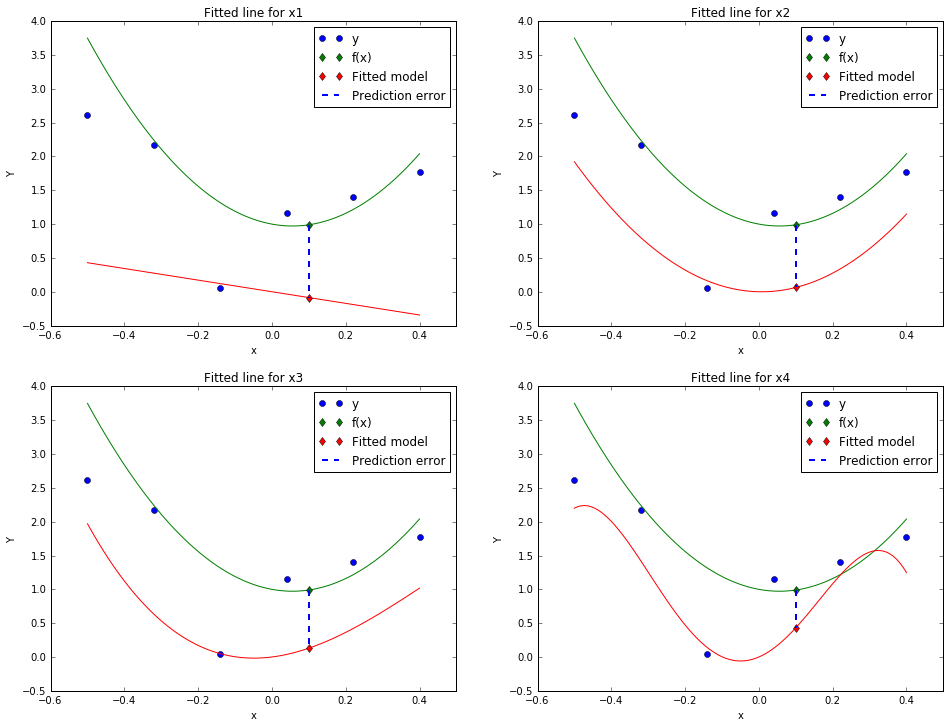

In [15]:
fig = plt.figure(figsize=(16,12))

def fx(x):
    return (9*(x**2)) - x + 1

x_fit = np.linspace(min(data3.x1),max(data3.x1),100)
y_fit = map(fx,x_fit)

for power in range(1,5):
    xId = 'x'+str(power)
    ax = fig.add_subplot(2,2,power)
    ax.set_xlim([-.6, .5])
    
    #(e.1) Draw the scatter plot
    ax.plot(data3.x1,data3.y,'o')
    
    #(e.2) Plot the curve of true function  f(x)=9x2−x+1 
    ax.plot(x_fit,y_fit,'g-')

    #(e.3) Plot your fitted curve, observe how our model fits the data as M increases
    
    y_fit2 = pd.DataFrame(np.matrix([x_fit**k for k in range(1,power+1)]).T,
                         columns = ['x1','x2','x3','x4'][0:power]).mul(Rdict[xId]['params'], 1).sum(1)    
    
    ax.plot(x_fit, y_fit2, 'r-')
    ax.set_title('Fitted line for ' + xId)
    ax.set_xlabel('x')
    ax.set_ylabel('Y')
    
#    (g.1) Pick a x value (at your discretion)  x0 , then locate the y value both on your fitted curve and on our function curve ( f(x0)
    x0 = 0.1
    x0List = [x0]

    exp = 2
    while exp <= 4:
        x0List.append(x0**exp)
        exp += 1

    x0Series = pd.Series(x0List, index=['x1','x2','x3','x4'])

    y0_true = fx(x0)
    y0_fited = x0Series.mul(Rdict[xId]['params']).sum()
    print 'y0_fited', y0_fited
    
    #(g.2) Mark these two points with a small diamond, then draw a dashed line connecting them
    #, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    
    ax.plot(x0,y0_true,'gd',label="f(x)")
    ax.plot(x0,y0_fited,'rd',label="Fitted model")
    ax.plot([x0,x0],[y0_true,y0_fited],'b--',lw = 2,label="Prediction error")
    plt.legend()

Based on the plot, the model that fits the true curve best is the second one, with only $x$ and $x^2$.

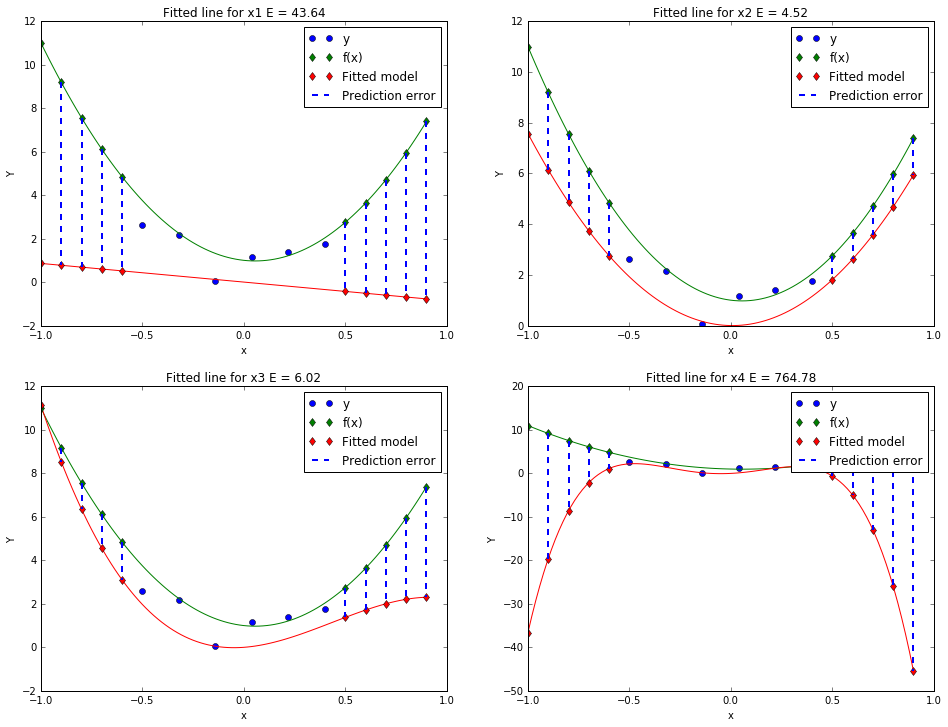

In [16]:
#(g.3) Repeat g.1 and g.2 up to ten times
#(i.e. select up to ten different future points and predict their values, compare your prediction with the true value), 

fig = plt.figure(figsize=(16,12))

#five points to the left, 5 to the right of the domain of original x1
g3points = np.array([-.6,-.7,-.8,-.9,-1,.5,.6,.7,.8,.9])
y_g3True = map(fx,g3points)

x_fit = np.linspace(min(g3points),max(g3points),100)
y_fit = map(fx,x_fit)



for power in range(1,5):
    xId = 'x'+str(power)
    ax = fig.add_subplot(2,2,power)
    ax.set_xlim([-1, 1])
    
    #(e.1) Draw the scatter plot
    ax.plot(data3.x1,data3.y,'o')
    
    #(e.2) Plot the curve of true function  f(x)=9x2−x+1 
    ax.plot(x_fit,y_fit,'g-')

    #(e.3) Plot your fitted curve, observe how our model fits the data as M increases
    
    y_fit2 = pd.DataFrame(np.matrix([x_fit**k for k in range(1,power+1)]).T,
                         columns = ['x1','x2','x3','x4'][0:power]).mul(Rdict[xId]['params'], 1).sum(1)    
    
    ax.plot(x_fit, y_fit2, 'r-')

    ax.set_xlabel('x')
    ax.set_ylabel('Y')
    
#    (g.1) Pick ten values (at your discretion) g3points, 
#    then locate the y value both on your fitted curve and on our function curve ( f(x0)

    y_g3fited = pd.DataFrame(np.matrix([g3points**k for k in range(1,power+1)]).T,
                         columns = ['x1','x2','x3','x4'][0:power]).mul(Rdict[xId]['params'], 1).sum(1) 
    
    #(g.2) Mark these ten points with a small diamond, then draw a dashed line connecting them
    #, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    

    #Compute the average sum of squares of errors
    aveSumSquaresErrors = sum((y_g3fited - y_g3True) ** 2)/10
    #mention it in your subfigure's title 
    ax.set_title('Fitted line for ' + xId + ' E = %.2f' % aveSumSquaresErrors)
    
    ax.plot(g3points,y_g3True,'gd',label="f(x)")
    ax.plot(g3points,y_g3fited,'rd',label="Fitted model")
    ax.plot([g3points[0],g3points[0]],[y_g3True[0],y_g3fited[0]],'b--',lw = 2,label="Prediction error")
    ax.plot([g3points[1:len(g3points)],g3points[1:len(g3points)]],[y_g3True[1:len(y_g3True)],y_g3fited[1:len(y_g3True)]],'b--',lw = 2)
    plt.legend()
    

#### Which model has the smallest average error  $E$ ? Does this fitted polynomial coincides with the M you picked in part f?

The model with the smalles average error is the second one, with only $x$ and $x^2$. It coincides